# Natural Language Processing using NLTK

In [1]:
# Install NLTK - pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /projects/f383c9fb-5c0c-448
[nltk_data]     3-b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /projects/f383c9fb-5c0c-4483-
[nltk_data]     b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NLP Part 0 - Get some Data!

This section's code is mostly given to you as a review for how you can scrape and manipulate data from the web. 

In [2]:
import urllib
import bs4 as bs
import re

In [3]:
# We will read the contents of the Wikipedia article "Global_warming" as an example, please feel free to use your own! You can use the url below:
url = 'https://en.wikipedia.org/wiki/Global_warming' # you can change this to use other sites as well.

# We can open the page using "urllib.request.urlopen" then read it using ".read()"
source = urllib.request.urlopen(url).read()

# Beautiful Soup is a Python library for pulling data out of HTML and XML files.
# you may need to install a parser library --> "!pip3 install lxml"
# Parsing the data/creating BeautifulSoup object

soup = bs.BeautifulSoup(source,"html.parser") 

# Fetching the data
text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    text += paragraph.text

# Preprocessing the data

text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [4]:
text[:100]

" contemporary climate change includes both global warming and its impacts on earth's weather pattern"

## NLP Part 1 - Tokenization of paragraphs/sentences

In this section we are going to tokenize our sentences and words. If you aren't familiar with tokenization, we recommend looking up "what is tokenization". 

You should also spend time on the [NLTK documentation](https://www.nltk.org/). If you're not sure how to do something, or get an error, it is best to google it first and ask questions as you go!

In [5]:
'''
Your code here: Tokenize the words from the data and set it to a variable called words.
Hint: how to this might be on the very home page of NLTK!
'''


words=nltk.word_tokenize(text)

In [6]:
print(words[:10])

['contemporary', 'climate', 'change', 'includes', 'both', 'global', 'warming', 'and', 'its', 'impacts']


In [7]:
'''
Your code here: Tokenize the sentences from the data  and set it to a variable called sentences.
Hint: try googling how to tokenize sentences in NLTK!
'''
sentences=nltk.sent_tokenize(text)

In [8]:
print(sentences[:10])

[" contemporary climate change includes both global warming and its impacts on earth's weather patterns.", 'there have been previous periods of climate change, but the current changes are distinctly more rapid and not due to natural causes.', 'instead, they are caused by the emission of greenhouse gases, mostly carbon dioxide (co ) and methane.', 'burning fossil fuels for energy production creates most of these emissions.', 'certain agricultural practices, industrial processes, and forest loss are additional sources.', 'as their name suggests, these gases trap heat from sunlight near the earth’s surface, warming it over time.', 'due to climate change, deserts are expanding, while heat waves and wildfires are becoming more common.', 'increased warming in the arctic has contributed to melting permafrost, glacial retreat and sea ice loss.', 'higher temperatures are also causing more intense storms, droughts, and other weather extremes.', 'rapid environmental change in mountains, coral ree

## NLP Part 2 - Stopwords and Punctuation
Now we are going to work to remove stopwords and punctuation from our data. Why do you think we are going to do this? Do some research if you don't know yet. 

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/f383c9fb-5c0c-4
[nltk_data]     483-b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
'''
define a function called "remove_stopwords" that takes in a list of the sentences of the text and returns one that doesn't have any stopwords.
'''
stop_words = set(stopwords.words('english'))
def remove_stopwords(sentences):
    ### Some code goes here. Hint: You may have to look up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in (stop_words)]
        sentences[i] = ' '.join(words)
    return sentences
###Then actually apply your function###
sentences = remove_stopwords(sentences)
print(sentences[:10]) #Check if it worked correctly. Are all stopwords removed?

["contemporary climate change includes global warming impacts earth 's weather patterns .", 'previous periods climate change , current changes distinctly rapid due natural causes .', 'instead , caused emission greenhouse gases , mostly carbon dioxide ( co ) methane .', 'burning fossil fuels energy production creates emissions .', 'certain agricultural practices , industrial processes , forest loss additional sources .', 'name suggests , gases trap heat sunlight near earth ’ surface , warming time .', 'due climate change , deserts expanding , heat waves wildfires becoming common .', 'increased warming arctic contributed melting permafrost , glacial retreat sea ice loss .', 'higher temperatures also causing intense storms , droughts , weather extremes .', 'rapid environmental change mountains , coral reefs , arctic forcing many species relocate become extinct .']


In [12]:
'''
define a function called "remove_punctuation" that removes punctuation from the sentences.
'''
def remove_punctuation(sentences):
    
    ### Some code goes here. Hint: Try looking up how to remove stopwords in NLTK if you get stuck. ###
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [word for word in words if word not in ",.!?()''[]``"]
        sentences[i] = ' '.join(words)
    return sentences
sentences = remove_punctuation(sentences)
print(sentences[:10]) #eliminating all punctuation.

["contemporary climate change includes global warming impacts earth 's weather patterns", 'previous periods climate change current changes distinctly rapid due natural causes', 'instead caused emission greenhouse gases mostly carbon dioxide co methane', 'burning fossil fuels energy production creates emissions', 'certain agricultural practices industrial processes forest loss additional sources', 'name suggests gases trap heat sunlight near earth ’ surface warming time', 'due climate change deserts expanding heat waves wildfires becoming common', 'increased warming arctic contributed melting permafrost glacial retreat sea ice loss', 'higher temperatures also causing intense storms droughts weather extremes', 'rapid environmental change mountains coral reefs arctic forcing many species relocate become extinct']


## NLP Part 3a - Stemming the words

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. There is an example below!



In [13]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# try each of the words below
stemmer.stem('troubled')
#stemmer.stem('trouble')
#stemmer.stem('troubling')
#stemmer.stem('troubles')

'troubl'

In [14]:
'''
Your code here:
Define a function called "stem_sentences" that takes in a list of sentences and returns a list of stemmed sentences.
'''


def stem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [stemmer.stem(word) for word in words]
        sentences[i] = ' '.join(words)
    return sentences
    ### Some code goes here. Hint: Try looking up how to stem words in NLTK if you get stuck (or simply use the example above and run stemmer in a loop!). ###
sentences = stem_sentences(sentences)
print(sentences[:10])

["contemporari climat chang includ global warm impact earth 's weather pattern", 'previou period climat chang current chang distinctli rapid due natur caus', 'instead caus emiss greenhous gase mostli carbon dioxid co methan', 'burn fossil fuel energi product creat emiss', 'certain agricultur practic industri process forest loss addit sourc', 'name suggest gase trap heat sunlight near earth ’ surfac warm time', 'due climat chang desert expand heat wave wildfir becom common', 'increas warm arctic contribut melt permafrost glacial retreat sea ice loss', 'higher temperatur also caus intens storm drought weather extrem', 'rapid environment chang mountain coral reef arctic forc mani speci reloc becom extinct']


In [153]:
print(sentences[:10])

["contemporari climat chang includ both global warm and it impact on earth 's weather pattern .", 'there have been previou period of climat chang , but the current chang are distinctli more rapid and not due to natur caus .', 'instead , they are caus by the emiss of greenhous ga , mostli carbon dioxid ( co ) and methan .', 'burn fossil fuel for energi product creat most of these emiss .', 'certain agricultur practic , industri process , and forest loss are addit sourc .', 'a their name suggest , these ga trap heat from sunlight near the earth ’ s surfac , warm it over time .', 'due to climat chang , desert are expand , while heat wave and wildfir are becom more common .', 'increas warm in the arctic ha contribut to melt permafrost , glacial retreat and sea ice loss .', 'higher temperatur are also caus more intens storm , drought , and other weather extrem .', 'rapid environment chang in mountain , coral reef , and the arctic is forc mani speci to reloc or becom extinct .']


## NLP Part 3b - Lemmatization

Lemmatization considers the context and converts the word to its meaningful base form. There is a cool tutorial and definition of lemmatization in NLTK [here](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/).



In [13]:
from nltk.stem import WordNetLemmatizer
    
## Step 1: Import the lemmatizer
lemmatizer = WordNetLemmatizer()

'''
Your code here: Define a function called "lem_sentences" that: loops through the sentences, split the sentences up by words and applies "lemmatizer.lemmatize" to each word and then join everything back into a sentence
'''
##Similar to stopwords: For loop through the sentences, split by words and apply "lemmatizer.lemmatize" to each word and join back into a sentence
def lem_sentences(sentences):
    for i in range(len(sentences)):
        words = nltk.word_tokenize(sentences[i])
        words = [lemmatizer.lemmatize(word) for word in words]
        sentences[i] = ' '.join(words)
    return sentences
sentences = lem_sentences(sentences)
print(sentences[:10]) 

["contemporary climate change includes global warming impact earth 's weather pattern", 'previous period climate change current change distinctly rapid due natural cause', 'instead caused emission greenhouse gas mostly carbon dioxide co methane', 'burning fossil fuel energy production creates emission', 'certain agricultural practice industrial process forest loss additional source', 'name suggests gas trap heat sunlight near earth ’ surface warming time', 'due climate change desert expanding heat wave wildfire becoming common', 'increased warming arctic contributed melting permafrost glacial retreat sea ice loss', 'higher temperature also causing intense storm drought weather extreme', 'rapid environmental change mountain coral reef arctic forcing many specie relocate become extinct']


In [14]:
print(sentences[:10]) 

["contemporary climate change includes global warming impact earth 's weather pattern", 'previous period climate change current change distinctly rapid due natural cause', 'instead caused emission greenhouse gas mostly carbon dioxide co methane', 'burning fossil fuel energy production creates emission', 'certain agricultural practice industrial process forest loss additional source', 'name suggests gas trap heat sunlight near earth ’ surface warming time', 'due climate change desert expanding heat wave wildfire becoming common', 'increased warming arctic contributed melting permafrost glacial retreat sea ice loss', 'higher temperature also causing intense storm drought weather extreme', 'rapid environmental change mountain coral reef arctic forcing many specie relocate become extinct']


## NLP Part 4 - POS Tagging
Parts of speech tagging is marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context.

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/f383c9fb-5c0c-4483-b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
# POS Tagging example
# CC - coordinating conjunction
# NN - noun, singular (cat, tree)
all_words = nltk.word_tokenize(text)  ###If we want to look at part of speech taking before we stem/lem

tagged_words = nltk.pos_tag(all_words)
##Creates a list of lists where each element of the list is [word,partofspeech abbreviation]

# Tagged word paragraph
word_tags = []
for tw in tagged_words:
    word_tags.append(tw[0]+"_"+tw[1])

tagged_paragraph = ' '.join(word_tags)

'''
Your code here: print the first 1000 characters of tagged_paragraph.
'''
print(tagged_paragraph[:1000])

contemporary_JJ climate_NN change_NN includes_VBZ both_DT global_JJ warming_NN and_CC its_PRP$ impacts_NNS on_IN earth_NN 's_POS weather_NN patterns_NNS ._. there_EX have_VBP been_VBN previous_JJ periods_NNS of_IN climate_NN change_NN ,_, but_CC the_DT current_JJ changes_NNS are_VBP distinctly_RB more_RBR rapid_JJ and_CC not_RB due_JJ to_TO natural_JJ causes_NNS ._. instead_RB ,_, they_PRP are_VBP caused_VBN by_IN the_DT emission_NN of_IN greenhouse_NN gases_NNS ,_, mostly_RB carbon_NN dioxide_NN (_( co_NN )_) and_CC methane_NN ._. burning_VBG fossil_JJ fuels_NNS for_IN energy_NN production_NN creates_VBZ most_JJS of_IN these_DT emissions_NNS ._. certain_JJ agricultural_JJ practices_NNS ,_, industrial_JJ processes_NNS ,_, and_CC forest_JJS loss_NN are_VBP additional_JJ sources_NNS ._. as_IN their_PRP$ name_NN suggests_VBZ ,_, these_DT gases_NNS trap_VBP heat_NN from_IN sunlight_NN near_IN the_DT earth_NN ’_NNP s_NN surface_NN ,_, warming_VBG it_PRP over_IN time_NN ._. due_JJ to_TO clim

# Word2Vec Model Visualization

In [17]:
# Install gensim - pip install gensim
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /projects/f383c9fb-5c0c-4483-
[nltk_data]     b8ae-54082ad4cf54/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
#Let's go ahead and create a list that's formatted how word2vec needs:
    # a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)
    
tokenized = [nltk.word_tokenize(sent) for sent in sentences]

In [19]:
# print the tokenized list of lists
print(tokenized[:10])

[['contemporary', 'climate', 'change', 'includes', 'global', 'warming', 'impact', 'earth', "'s", 'weather', 'pattern'], ['previous', 'period', 'climate', 'change', 'current', 'change', 'distinctly', 'rapid', 'due', 'natural', 'cause'], ['instead', 'caused', 'emission', 'greenhouse', 'gas', 'mostly', 'carbon', 'dioxide', 'co', 'methane'], ['burning', 'fossil', 'fuel', 'energy', 'production', 'creates', 'emission'], ['certain', 'agricultural', 'practice', 'industrial', 'process', 'forest', 'loss', 'additional', 'source'], ['name', 'suggests', 'gas', 'trap', 'heat', 'sunlight', 'near', 'earth', '’', 'surface', 'warming', 'time'], ['due', 'climate', 'change', 'desert', 'expanding', 'heat', 'wave', 'wildfire', 'becoming', 'common'], ['increased', 'warming', 'arctic', 'contributed', 'melting', 'permafrost', 'glacial', 'retreat', 'sea', 'ice', 'loss'], ['higher', 'temperature', 'also', 'causing', 'intense', 'storm', 'drought', 'weather', 'extreme'], ['rapid', 'environmental', 'change', 'mount

## Training the Word2Vec model

For this part you may want to follow a guide [here](https://radimrehurek.com/gensim/models/word2vec.html). 

In [20]:
''' Training the Word2Vec model. You should pass:
1. a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence
2. min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
'''
# create the model
tokenized=[nltk.word_tokenize(sent) for sent in sentences]
model = Word2Vec(sentences=tokenized, min_count=1)

model.save('word2vec.model')
# get the most common words of the model (it's entire vocabulary)

# save the model to use it later

model = Word2Vec.load("word2vec.model")


In [21]:
#print the first 10 most common words.
print(model.wv.index_to_key[:10])

['climate', 'change', 'warming', 'emission', 'global', 'co', 'gas', 'energy', 'greenhouse', 'carbon']


In [48]:
# Look up the most similar words to certain words in your text using the model.wv.most_similar() function
similar1=model.wv.most_similar('climate')
similar2=model.wv.most_similar('change')
similar1,similar2

([('carbon', 0.46912258863449097),
  ('future', 0.42373916506767273),
  ('increase', 0.42241209745407104),
  ('use', 0.39266088604927063),
  ('energy', 0.3874376714229584),
  ('people', 0.3786971867084503),
  ('preventing', 0.3737652897834778),
  ('%', 0.34751009941101074),
  ('major', 0.3439834713935852),
  ('vapour', 0.3300567865371704)],
 [('irreversible', 0.3743503987789154),
  ('land', 0.34571680426597595),
  ('tomorrow', 0.34446045756340027),
  ('would', 0.32817181944847107),
  ('model', 0.3201315999031067),
  ('climate', 0.3155685365200043),
  ('cycling', 0.3145904541015625),
  ('air', 0.30446821451187134),
  ('commitment', 0.29642388224601746),
  ('displace', 0.2912105917930603)])

## Testing our model

In [50]:
    # Finding Word Vectors - print word vectors for certain words in your text
vector = model.wv['global']  # get numpy vector of a word

print(vector)

[-0.00807352  0.00281393 -0.00708094 -0.00102827  0.00425008  0.0019082
  0.00202213  0.00769187 -0.00658671  0.00597151 -0.007244    0.00119729
 -0.00916845  0.00353367 -0.00475074 -0.00604    -0.00242214  0.00334862
  0.00558241 -0.00878728  0.00268213 -0.00725794  0.00808488  0.00741176
 -0.00271494  0.0008153  -0.0010519   0.00329397 -0.01136446  0.00128959
  0.01035441  0.00254768  0.00167632 -0.01118596  0.00708293 -0.00351751
 -0.00334936  0.00141931 -0.00182222 -0.00368617  0.00118308 -0.00849245
 -0.01019689  0.00942227  0.00808394 -0.00765546  0.00147633 -0.00050707
  0.00637395 -0.00604992  0.00566395  0.0022357   0.00883556 -0.00444235
 -0.00241617 -0.00613217 -0.00879946 -0.01020196 -0.00354844 -0.0063676
  0.00507031 -0.0050136   0.00162957  0.0005187  -0.00692491  0.00108173
  0.00993803  0.01042834 -0.0072622   0.01159844 -0.00698473  0.0075796
  0.00015712  0.00184219  0.00539325  0.00798574 -0.00220169  0.00890419
  0.00558554 -0.00920697 -0.00935183 -0.00758202  0.00

In [0]:
    ### Finding the most similar words in the model ###

In [51]:
similar1, similar2

([('carbon', 0.46912258863449097),
  ('future', 0.42373916506767273),
  ('increase', 0.42241209745407104),
  ('use', 0.39266088604927063),
  ('energy', 0.3874376714229584),
  ('people', 0.3786971867084503),
  ('preventing', 0.3737652897834778),
  ('%', 0.34751009941101074),
  ('major', 0.3439834713935852),
  ('vapour', 0.3300567865371704)],
 [('irreversible', 0.3743503987789154),
  ('land', 0.34571680426597595),
  ('tomorrow', 0.34446045756340027),
  ('would', 0.32817181944847107),
  ('model', 0.3201315999031067),
  ('climate', 0.3155685365200043),
  ('cycling', 0.3145904541015625),
  ('air', 0.30446821451187134),
  ('commitment', 0.29642388224601746),
  ('displace', 0.2912105917930603)])

<Figure size 432x288 with 0 Axes>

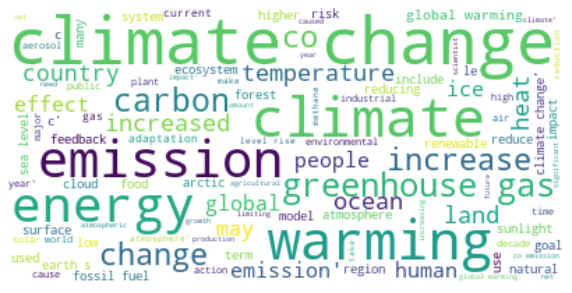

In [52]:
# code to print a wordcloud for your sentences
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Why did we do all this work?

In [54]:
# reFetching the data
lame_text = ""
for paragraph in soup.find_all('p'): #The <p> tag defines a paragraph in the webpages
    lame_text += paragraph.text

In [57]:
'''
Doing the same without removing stop words or lemming
'''
# tokenize the text using sent_tokenize
lame_sentences = nltk.sent_tokenize(lame_text)
lame_tokenized = [nltk.word_tokenize(sentence) for sentence in lame_sentences]
# from this list of sentences, create a list of lists where the ith entry in the list is the word tokenizaiton of the ith sentence (after preprocessing)

<Figure size 432x288 with 0 Axes>

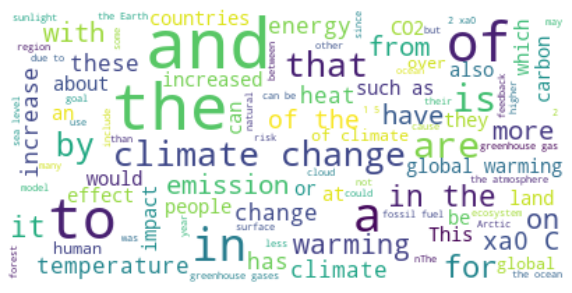

In [58]:
# Redo the word cloud but set stopwords to empty so it looks really bad
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42, ###SET STOPWORDS = [] and/or include_numbers = True or you will get the same thing!!!
                        stopwords = [],
                        include_numbers = True).generate(str(lame_sentences)) 
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
# Training the Word2Vec model (same code as before), but one change: use our lame data that was not preprocessed

# Try printing this after training the model.
words = model.wv.index_to_key
print(words[:10])

['climate', 'change', 'warming', 'emission', 'global', 'co', 'gas', 'energy', 'greenhouse', 'carbon']


In [0]:
# Finding a vector of a word, but badly

In [0]:
### Finding the most similar words in the model but... you get the idea ###



## Reflection
How important do you think proper preprocessing in NLP is?